# Visual

In [1]:
# Take functions from func_collection.py
import func_collection
from pathlib import PurePath

In [2]:
# Group problems list by thefirst two parts of the file name (e.g., first group by 'c1_10' from 'c1_10_1.txt', 'c1_10_2.txt', etc., second group by 'C2_4' from 'c2_4_1.txt', 'c2_4_2.txt', etc.)
def group_problems_by_size(problems):
    grouped = {}
    for problem in problems:
        stem = PurePath(problem).stem  # Get the file name without extension
        parts = stem.split('_')
        if len(parts) < 2:
            continue  # Skip if the file name doesn't have enough parts
        key = f"{parts[0]}_{parts[1]}"  # Create key from first two parts
        if key not in grouped:
            grouped[key] = []
        grouped[key].append(problem)
    return grouped

In [3]:
'''# Visualizing customer locations for Homberger Clustered Customer Problems
import matplotlib.pyplot as plt

# Get all problem files 'C1' & 'C2' grouped by size
all_problems = func_collection.get_txt_files_name()
grouped_problems = group_problems_by_size([p for p in all_problems if 'C1' in PurePath(p).stem or 'C2' in PurePath(p).stem])
# Visualize each group
for size_key, problem_files in grouped_problems.items():
    plt.figure(figsize=(12, 8))
    for problem_file in problem_files:
        content = func_collection.extract_content(problem_file)
        coords = content['coords']
        x, y = zip(*coords)
        plt.scatter(x, y, label=PurePath(problem_file).stem)
    plt.title(f'Customer Locations for Problems of Size {size_key}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()'''

"# Visualizing customer locations for Homberger Clustered Customer Problems\nimport matplotlib.pyplot as plt\n\n# Get all problem files 'C1' & 'C2' grouped by size\nall_problems = func_collection.get_txt_files_name()\ngrouped_problems = group_problems_by_size([p for p in all_problems if 'C1' in PurePath(p).stem or 'C2' in PurePath(p).stem])\n# Visualize each group\nfor size_key, problem_files in grouped_problems.items():\n    plt.figure(figsize=(12, 8))\n    for problem_file in problem_files:\n        content = func_collection.extract_content(problem_file)\n        coords = content['coords']\n        x, y = zip(*coords)\n        plt.scatter(x, y, label=PurePath(problem_file).stem)\n    plt.title(f'Customer Locations for Problems of Size {size_key}')\n    plt.xlabel('X Coordinate')\n    plt.ylabel('Y Coordinate')\n    plt.legend()\n    plt.grid(True)\n    plt.show()"

# Route Visualization (Initial vs Final)


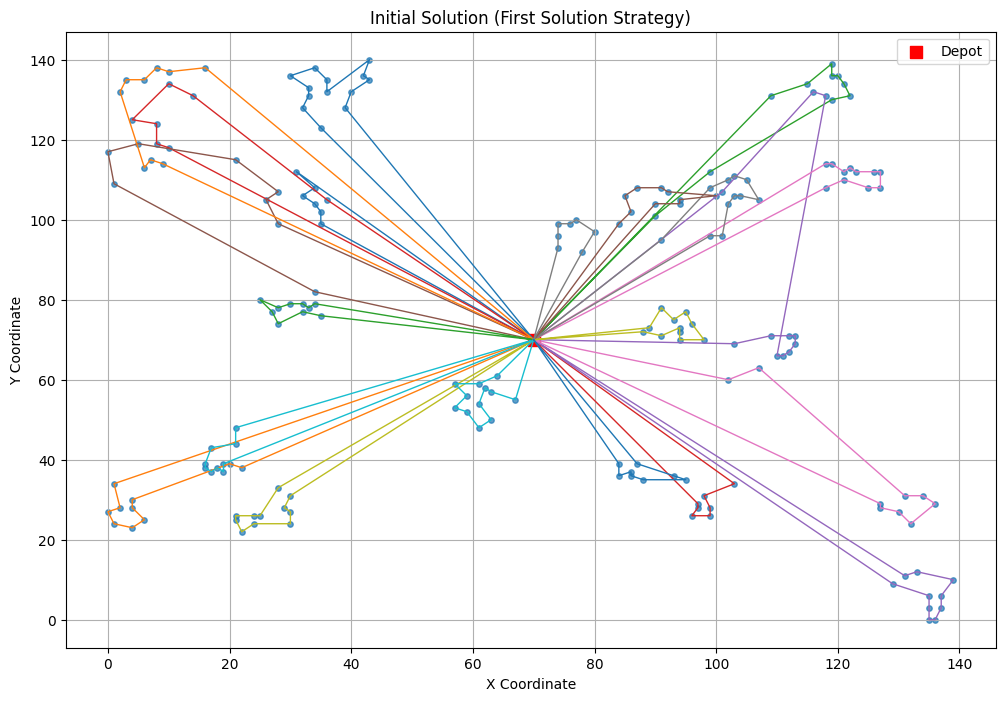

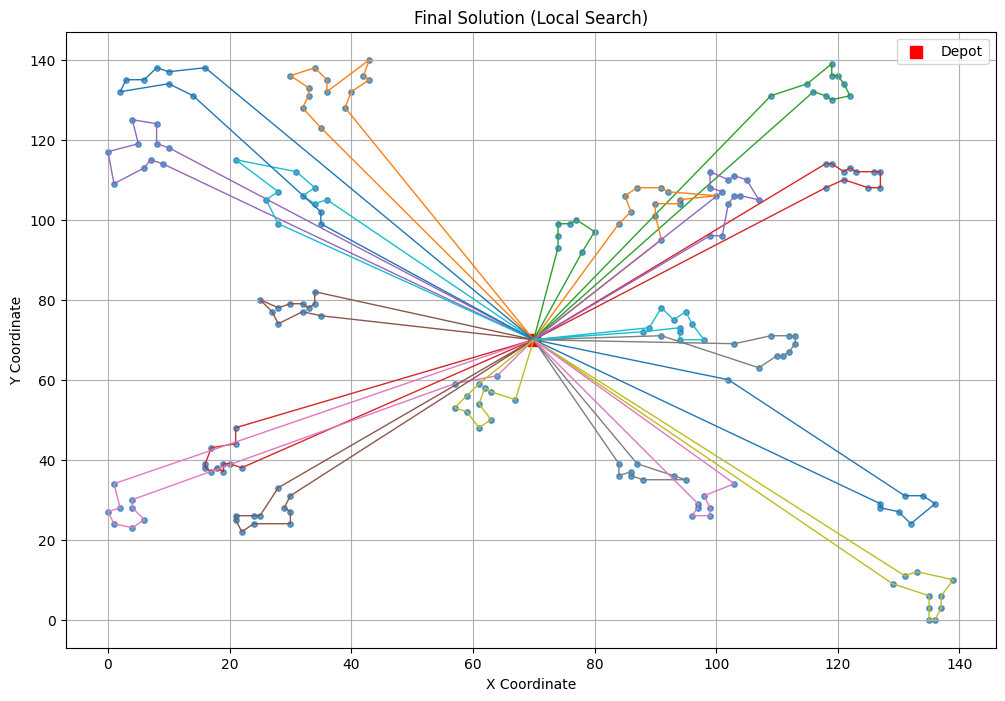

In [5]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

results_path = Path("results/c1_2_1_routes.json")
with results_path.open() as file:
    route_data = json.load(file)

coords = route_data["coords"]
initial_routes = route_data["initial_routes"]
final_routes = route_data["final_routes"]

def plot_routes(coords, routes, title):
    plt.figure(figsize=(12, 8))
    x, y = zip(*coords)
    plt.scatter(x, y, s=15, alpha=0.7)
    plt.scatter([coords[0][0]], [coords[0][1]], s=80, c="red", marker="s", label="Depot")
    for route in routes:
        if len(route) <= 2:
            continue
        rx = [coords[i][0] for i in route]
        ry = [coords[i][1] for i in route]
        plt.plot(rx, ry, linewidth=1)
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_routes(coords, initial_routes, "Initial Solution (First Solution Strategy)")
plot_routes(coords, final_routes, "Final Solution (Local Search)")


# ML Top Edge Visualization


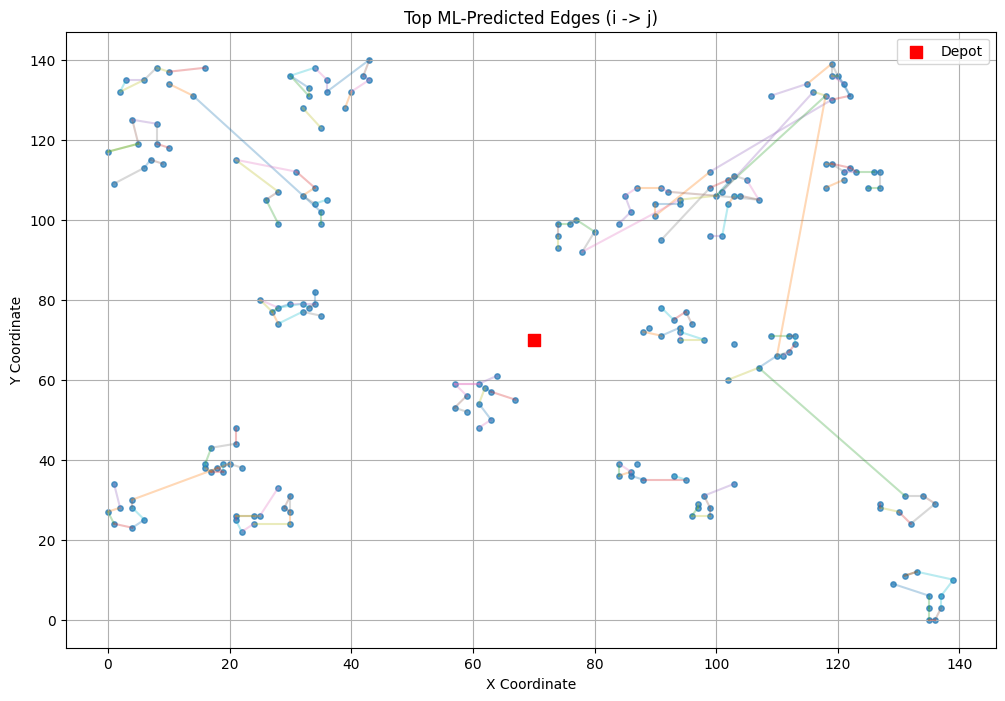

In [6]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

edges_path = Path("results/c1_2_1_ml_edges.json")
with edges_path.open() as file:
    edge_data = json.load(file)

coords = edge_data["coords"]
top_edges = edge_data["top_edges"]

plt.figure(figsize=(12, 8))
x, y = zip(*coords)
plt.scatter(x, y, s=15, alpha=0.7)
plt.scatter([coords[0][0]], [coords[0][1]], s=80, c="red", marker="s", label="Depot")
for i, j, score in top_edges:
    plt.plot([coords[i][0], coords[j][0]], [coords[i][1], coords[j][1]], alpha=0.3)
plt.title("Top ML-Predicted Edges (i -> j)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


# OR-Tools vs ML Edge Overlay
This compares OR-Tools routes to ML-predicted edges (not a full ML-feasible route).


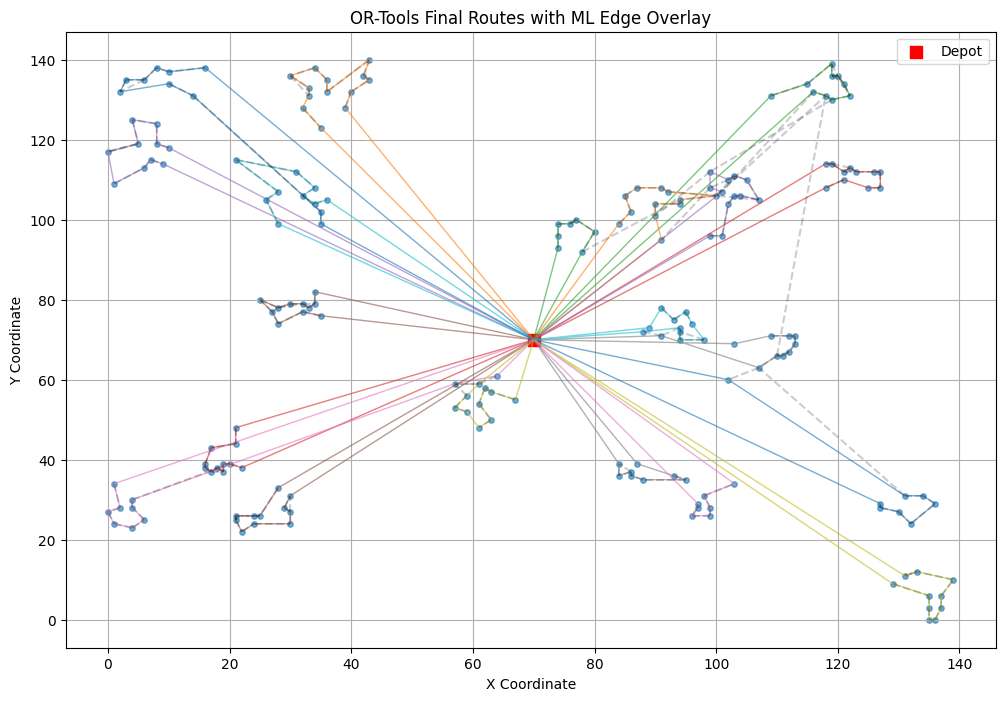

In [7]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

routes_path = Path("results/c1_2_1_routes.json")
edges_path = Path("results/c1_2_1_ml_edges.json")

with routes_path.open() as file:
    route_data = json.load(file)
with edges_path.open() as file:
    edge_data = json.load(file)

coords = route_data["coords"]
final_routes = route_data["final_routes"]
top_edges = edge_data["top_edges"]

def plot_or_and_ml(coords, routes, edges, title):
    plt.figure(figsize=(12, 8))
    x, y = zip(*coords)
    plt.scatter(x, y, s=15, alpha=0.6)
    plt.scatter([coords[0][0]], [coords[0][1]], s=80, c="red", marker="s", label="Depot")
    for route in routes:
        if len(route) <= 2:
            continue
        rx = [coords[i][0] for i in route]
        ry = [coords[i][1] for i in route]
        plt.plot(rx, ry, linewidth=1, alpha=0.6, label=None)
    for i, j, score in edges:
        plt.plot([coords[i][0], coords[j][0]], [coords[i][1], coords[j][1]], alpha=0.2, linestyle="--", color="black")
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_or_and_ml(coords, final_routes, top_edges, "OR-Tools Final Routes with ML Edge Overlay")


# Stats Comparison (OR-Tools vs ML Data)
OR-Tools stats are route-based; ML stats summarize edge-label data.


In [8]:
import csv
from pathlib import Path

def read_csv_dicts(path):
    with Path(path).open(newline="") as file:
        return list(csv.DictReader(file))

day1_final = read_csv_dicts("results/day1_final.csv")[0]
baselines = read_csv_dicts("results/baselines.csv")
ml_summary = read_csv_dicts("results/ml_summary.csv")[0]

def to_float(value):
    try:
        return float(value)
    except (TypeError, ValueError):
        return None

def to_int(value):
    try:
        return int(float(value))
    except (TypeError, ValueError):
        return None

baseline_vehicle = [to_int(row["vehicle_used"]) for row in baselines]
baseline_distance = [to_float(row["total_distance"]) for row in baselines]
baseline_runtime = [to_float(row["runtime_sec"]) for row in baselines]

baseline_vehicle = [v for v in baseline_vehicle if v is not None]
baseline_distance = [d for d in baseline_distance if d is not None]
baseline_runtime = [r for r in baseline_runtime if r is not None]

print("OR-Tools Final (single run):")
print(day1_final)
print()
print("OR-Tools Baselines (30 runs):")
print({
    "avg_vehicle_used": round(sum(baseline_vehicle) / len(baseline_vehicle), 3),
    "min_vehicle_used": min(baseline_vehicle),
    "avg_total_distance": round(sum(baseline_distance) / len(baseline_distance), 3),
    "min_total_distance": round(min(baseline_distance), 3),
    "avg_runtime_sec": round(sum(baseline_runtime) / len(baseline_runtime), 3),
})
print()
print("ML Edge Summary (not a route score):")
positive_edges = int(float(ml_summary["positive_edges"]))
total_edges = int(float(ml_summary["total_edges"]))
print({
    "positive_edges": positive_edges,
    "total_edges": total_edges,
    "positive_rate": round(positive_edges / total_edges, 6),
    "train_size": int(float(ml_summary["train_size"])),
    "test_size": int(float(ml_summary["test_size"])),
    "pos_weight": float(ml_summary["pos_weight"]),
})


OR-Tools Final (single run):
{'instance': 'c1_2_1', 'vehicle_used': '20', 'total_distance': '2706.4324664125907', 'runtime_sec': '30.0034', 'solution_found': 'True'}

OR-Tools Baselines (30 runs):
{'avg_vehicle_used': 20.0, 'min_vehicle_used': 20, 'avg_total_distance': 2803.946, 'min_total_distance': 2795.522, 'avg_runtime_sec': 5.004}

ML Edge Summary (not a route score):
{'positive_edges': 185, 'total_edges': 39800, 'positive_rate': 0.004648, 'train_size': 31840, 'test_size': 7960, 'pos_weight': 205.7532}
